# Project 001 UCSD Data Science Visualization Bootcamp
## Plots and Gralphics Workbook
* Noreen Malik 😃
* Rene Venema("dutch") 🐱
* John Warlop 🦁
* Alex Wooten 🏄
😛😳😗😓🙉😸🙈🙊😽💀💢💥✨💏👫👄👃👀👛👛🗼🔮🔮🎄🎅👻

# Depencencies

In [32]:
import pandas as pd
import matplotlib.pylab as plt


# >>>>>>>>>>>>>>>>>>>>>>>>>>> END DEPENDENCIES  SECTION <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# Constants

In [6]:
# Pickled Files
AGI_PICKLE           = 'df_agi.pkl' #Cleaned up df after merging medicare and irs data
IRS_DATAFRAME_PICKLE = 'df_irs.pkl' #Raw file from IRS Tax Year 2015

# >>>>>>>>>>>>>>>>>>>>>>>>>>> END CONSTANTS  SECTION <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# John's Plots

In [30]:
df_agi = pd.read_pickle(AGI_PICKLE)
oop = [j/k for i,j,k in \
       zip(df_agi['atp'].tolist(),df_agi['amp'].tolist(),df_agi['ttl_dis'].tolist())]


2769

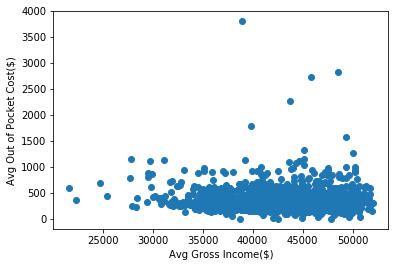

In [38]:
plt.scatter(df_agi['avgAGI'].tolist(),oop)
plt.xlabel("Avg Gross Income($)")
plt.ylabel("Avg Out of Pocket Cost($)")
plt.show()
#ax = df.plot(kind='scatter', x='Avg Adj Gross Income', y='Out-Of-Pocket Costs')

# >>>>>>>>>>>>>>>>>>>>>>>>>>> END JOHN'S  SECTION <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# Alex's Plots

In [ ]:


# >>>>>>>>>>>>>>>>>>>>>>>>>>> END ALEX'S  SECTION <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# Dutch's Plots

In [ ]:


# >>>>>>>>>>>>>>>>>>>>>>>>>>> END DUTCH'S  SECTION <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<